In [1]:
#importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np

In [2]:
#importing data
df = pd.read_csv('Footballdata.csv')
#checking info to see what columns (features) are present
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   National_Position   1075 non-null   object 
 3   National_Kit        1075 non-null   float64
 4   Club                17588 non-null  object 
 5   Club_Position       17587 non-null  object 
 6   Club_Kit            17587 non-null  float64
 7   Club_Joining        17587 non-null  object 
 8   Contract_Expiry     17587 non-null  float64
 9   Rating              17588 non-null  int64  
 10  Height              17588 non-null  object 
 11  Weight              17588 non-null  object 
 12  Preffered_Foot      17588 non-null  object 
 13  Birth_Date          17588 non-null  object 
 14  Age                 17588 non-null  int64  
 15  Preffered_Position  17588 non-null  object 
 16  Work

In [3]:
#dropping unnecessary columns
df2 = df.drop(['Name', 'Nationality', 'National_Kit', 'Club', 'Club_Kit', 'Club_Joining', 'Contract_Expiry', 
               'National_Position', 'Rating', 'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position', 'Work_Rate',
              'Height', 'Weight', 'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes'],
              axis=1)

In [4]:
#checking all the unique positions for players
pd.unique(df['Club_Position'])

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)


List of all positions I need:
Forward - LW, RW, ST, RS, LF, LS, RF, CF
Mid - RCM, CAM, LCM, LM, LDM, RM, CDM, RDM, LAM, CM, RAM

In [5]:
#replacing the values of all unnecessary positions (not midfielders or forwards) and dropping them
df_removal = df2.replace(['GK', 'Sub', 'LCB', 'RB', 'RCB', 'LB', 'CB', 'Res', 'RWB', 'LWB'] , np.nan)
df_removal = df_removal.dropna().reset_index(drop=True)

In [6]:
#changing the name of all forward positions to forward and all midfielder positions to midfielder
df_update = df_removal.replace(['LW', 'RW', 'ST', 'RS', 'LF', 'LS', 'RF', 'CF'], 'Forward')
df_update = df_update.replace(['RCM', 'CAM', 'LCM', 'LM', 'LDM', 'RM', 'CDM', 'RDM', 'LAM', 'CM', 'RAM'], 'Midfielder')
#ensuring that the replacemnet was successful
pd.unique(df_update['Club_Position'])

array(['Forward', 'Midfielder'], dtype=object)

In [7]:
#changing the club_positiosn to binary values of 1 and 0 as Logistic Regression model cannot take string values
le = LabelEncoder()
df_update['Club_Position'] = le.fit_transform(df_update['Club_Position'])
#ensuring if label encoding was successful
pd.unique(df_update['Club_Position'])

array([0, 1])

In [8]:
#converting the columns headings for the dataframe into a list
column_list = list(df_update.columns.values)
column_list[1:]

['Weak_foot',
 'Skill_Moves',
 'Ball_Control',
 'Dribbling',
 'Marking',
 'Sliding_Tackle',
 'Standing_Tackle',
 'Aggression',
 'Reactions',
 'Attacking_Position',
 'Interceptions',
 'Vision',
 'Composure',
 'Crossing',
 'Short_Pass',
 'Long_Pass',
 'Acceleration',
 'Speed',
 'Stamina',
 'Strength',
 'Balance',
 'Agility',
 'Jumping',
 'Heading',
 'Shot_Power',
 'Finishing',
 'Long_Shots',
 'Curve',
 'Freekick_Accuracy',
 'Penalties',
 'Volleys']

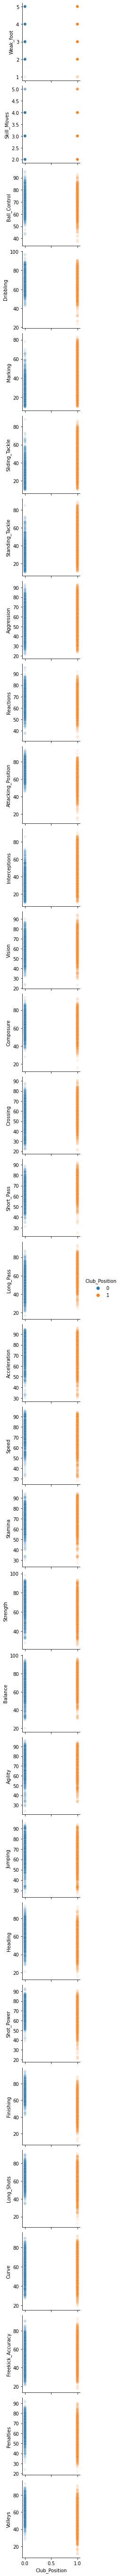

In [9]:
#generating pariplot to check how different features differntiate for forwards and midfielders
sns.pairplot(
    df_update,
    x_vars=['Club_Position'],
    y_vars=column_list[1:],
    hue='Club_Position',
    kind='scatter', 
    plot_kws={'alpha':0.1}
)

Posssible Correlations: Dribbling, Marking, Sliding_Tackle, Standing_Tackle, Attacking_Position, Interceptions, Short_Pass, Long_Pass, Speed, Balance, Agility, Shot_Power, Finishing, Penalties, Volleys, Curve

In [10]:
#making the final dataframe that only has the features that I need
df_trial_1 = df_update[['Club_Position', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Attacking_Position', 
                       'Interceptions', 'Short_Pass', 'Long_Pass', 'Speed', 'Balance', 'Agility', 'Shot_Power',
                       'Finishing', 'Penalties', 'Volleys', 'Curve']]
df_trial_1 = df_trial_1.rename(columns = {'Club_Position':'Position'})

In [11]:
#assigning the columns to X and y 
X = df_trial_1[df_trial_1.columns[1:]]
y = df_trial_1[['Position']]

#splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fitting to the logistic regression model
clf = LogisticRegression(random_state=123, solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train.values.ravel())

#checking the accuracy score of my ML pipeline
print(f'Model Accuracy: {clf.score(X_test, y_test)}')

Model Accuracy: 0.8745046235138706


In [12]:
#showing predictions and actual values side by side
predictions = le.inverse_transform(clf.predict(X_test))
actual_values = le.inverse_transform(np.concatenate(y_test.values, axis=0))
data = {
    'Predictions': predictions,
    'Actual Values': actual_values
}
df_predictions = pd.DataFrame(data)
df_predictions

,Predictions,Actual Values
0,Forward,Forward
1,Forward,Forward
2,Midfielder,Midfielder
3,Midfielder,Midfielder
4,Midfielder,Midfielder
...,...,...
752,Midfielder,Midfielder
753,Midfielder,Midfielder
754,Midfielder,Midfielder
755,Midfielder,Midfielder
